In [3]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import random

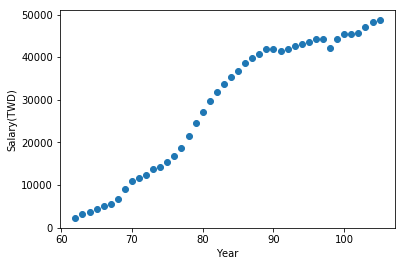

In [4]:
# define our dataset
data = np.genfromtxt('taiwan-salary.csv', delimiter=',')
years = data[:, 0] # x
salarys = data[:, 1] # y
m = salarys.size

# plot data
plt.scatter(years, salarys)
plt.xlabel("Year")
plt.ylabel("Salary(TWD)")
plt.show()

## Linear Regression with one variable
在這次的實驗當中，我們想要觀察的變量為「薪水」，輸入為年份

### 1. 定義成本函數
$$
h(x)=weight * x
$$
$$
J(W) = \frac{1}{2m}\sum_{i=1}^{m} (h(x) - y)^2
$$

### 2. 線性方程式
$$
h(x)=ax+b
$$

### 3. 梯度下降更新權重
$$
W = W - \alpha * \frac{1}{m} \sum_{i=1}^{m}(h(x) - y) * x
$$

In [111]:
# normalization
weights = 2500
train_data = years
train_label = salarys



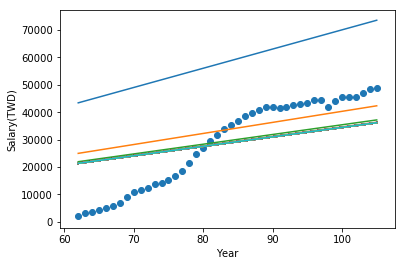

next year Salary in Taiwan would be: $36849.5302123
Salary in Taiwan at 150 would be: $51658.2199238


In [136]:
def predict(X, weight):
    return weight * X

def error(X, weights, Y):
    return (predict(X, weights) - Y)**2

def cost(data, weights, Y):
    sum = 0
    m = len(data)
    for i in range(0, m):
        sum += error(data[i], weights, Y[i])
    return (1 / (2*m)) * sum
def gradient(data, weights, Y, alpha, step):
    m = len(data)
    points = []
    for i in range(0, step):
        prediction = data * weights
        errors = prediction - Y

        gradient = (1/m) * alpha * np.sum(errors)
        weights = weights - gradient
        plt.plot(years, data * weights)
        points.append(cost(data, weights, Y))
    return weights


w = gradient(train_data, weights, train_label, 0.01, 100)
plt.scatter(years, salarys)
plt.xlabel("Year")
plt.ylabel("Salary(TWD)")
plt.show()

print("next year Salary in Taiwan would be: " + "$" + str(w * 107))
print("Salary in Taiwan at 150 would be: " + "$" + str(w * 150))


## 問題：
1. 感覺訓練出來的結果還不夠接近資料的分佈，為什麼呢？
2. cost 收斂到一定程度後就沒有再繼續下降了，為什麼？
3. 這個 model 只有一個變數（年份），但年份不一定是影響薪水的主要因素，更重要的或許是物價指數、勞工工時等等，因此在分析資料時，知道如何選用哪些特徵是相當重要的。
4. 如果輸入的資料非線性的話怎麼辦？可以透過加入平方項的特徵解決。